# Reverse Engineering the onderhoudsverzoeken API




## To do:
[] plantuml png handmatig => automatisch <br>

## Contents:
1. Basic info of the API and inspection
2. Getting the paths and endpoints
3. Getting the objects with attributes
4. Writing it to json, plantuml and .csv

## 1. Basic info of the API and inspection

In [1]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie'

In [2]:
import glob
my_jsons=glob.glob('*.json')
my_yamls = glob.glob('*.yaml')
my_jsons, my_yamls

(['planningsverzoeken-api.json',
  'planningsverzoeken-api_data.json',
  'Saxton API_data.json',
  'saxton.json'],
 ['saxton.yaml'])

In [4]:
#loading the API into active dictionary
import json

with open('C:\\Users\\31653\\Desktop\\DeAlliantie\\onderhoudsverzoeken-api.json') as f:
    spec = json.load(f)

In [5]:
list(spec)

['swagger',
 'info',
 'host',
 'tags',
 'schemes',
 'paths',
 'definitions',
 'security',
 'securityDefinitions',
 'basePath']

In [6]:
spec['schemes']

['https']

In [10]:
API_version =spec['info']['version']
API_version = "v"+API_version[:5]
OAS_version =spec['swagger']
API_name = spec['info']['title']
print('OAS:'+OAS_version, API_name, API_version)

OAS:2.0 onderhoudsverzoeken-api v1.7.7


## 2. Getting the paths and endpoints

In [11]:
paths =list(spec['paths'])
print(len(paths))
paths

2


['/v1/onderhoud/onderhoudsverzoeken',
 '/v1/onderhoud/onderhoudsverzoeken/{identificatie}']

In [12]:
endpoints_dict = {}
for i in range (len(paths)):
    endpoints_dict[paths[i]]=list(spec['paths'][paths[i]])
endpoints_dict

{'/v1/onderhoud/onderhoudsverzoeken': ['get', 'post'],
 '/v1/onderhoud/onderhoudsverzoeken/{identificatie}': ['get']}

## 3. Getting the objects

In [13]:
#inspection of the objects
spec['definitions']

{'OnderhoudsverzoekResponse': {'type': 'object',
  'properties': {'identificatie': {'type': 'string'},
   'omschrijving': {'type': 'string'},
   'status': {'type': 'string'},
   'onderhoudSoort': {'type': 'string'},
   'melddatum': {'type': 'string', 'format': 'date-time'},
   'extraElementen': {'$ref': '#/definitions/ExtraElementenOnderhoudsverzoekResponse'},
   'alternatiefContactgegeven': {'type': 'string'},
   'onderhoudsorders': {'type': 'array',
    'items': {'$ref': '#/definitions/OnderhoudsorderResponse'}},
   'melder': {'$ref': '#/definitions/NatuurlijkPersoon'},
   'onderhoudstaken': {'type': 'array',
    'items': {'$ref': '#/definitions/OnderhoudstaakResponse'}}}},
 'Eenheid': {'type': 'object',
  'properties': {'identificatie': {'type': 'string'},
   'gebouw': {'$ref': '#/definitions/Gebouw'},
   'extraElementen': {'$ref': '#/definitions/ExtraElementenEenheid'}}},
 'Pand': {'type': 'object',
  'properties': {'identificatie': {'type': 'string'}}},
 'ExtraElementenEenheid': {

In [14]:
objects = list(spec['definitions'])
print(len(objects))
objects

30


['OnderhoudsverzoekResponse',
 'Eenheid',
 'Pand',
 'ExtraElementenEenheid',
 'OmschrijvingDetails',
 'GegevenAntwoorden',
 'ExtraElementenOnderhoudstaakResponse',
 'Gebouw',
 'OnderhoudsorderResponse',
 'NatuurlijkPersoon',
 'Punt',
 'FinancieelBedrijf',
 'Rechtspersoon',
 'OnderhoudstaakResponse',
 'OnderhoudsverzoekKerngevens',
 'Gemeente',
 'Contactgegeven',
 'ExtraElementenOnderhoudsverzoekResponse',
 'Wijk',
 'Buurt',
 'Woonplaats',
 'Adres',
 'Afspraak',
 'ErrorResponse',
 'OnderhoudsorderRequest',
 'OnderhoudsverzoekRequest',
 'OnderhoudstaakRequest',
 'OnderhoudsorderRequestExtraElementen',
 'ExtraElementenOnderhoudsverzoekRequest',
 'OnderhoudstaakRequestExtraElementen']

In [15]:
#inspection of an object
spec['definitions']['Eenheid']

{'type': 'object',
 'properties': {'identificatie': {'type': 'string'},
  'gebouw': {'$ref': '#/definitions/Gebouw'},
  'extraElementen': {'$ref': '#/definitions/ExtraElementenEenheid'}}}

In [16]:
#creating a dictionary with objects and their properties
object_dict ={}
objects = list(spec['definitions'])
for i in range (len(objects)):
    try:
        object_dict[objects[i]]=list(spec['definitions'][objects[i]]['properties'])#['properties']
    except:
        pass
object_dict 

{'OnderhoudsverzoekResponse': ['identificatie',
  'omschrijving',
  'status',
  'onderhoudSoort',
  'melddatum',
  'extraElementen',
  'alternatiefContactgegeven',
  'onderhoudsorders',
  'melder',
  'onderhoudstaken'],
 'Eenheid': ['identificatie', 'gebouw', 'extraElementen'],
 'Pand': ['identificatie'],
 'ExtraElementenEenheid': ['gebouw',
  'pand',
  'bedrijf',
  'contractvalidfromdatum'],
 'OmschrijvingDetails': ['adres',
  'telefoonnummer',
  'betreftVve',
  'betreftSa',
  'opmerking',
  'gebruiker',
  'locatie',
  'locatieOnderdeel',
  'probleem',
  'probleemDetails',
  'onderwerp',
  'gegevenAntwoorden'],
 'GegevenAntwoorden': ['vraag', 'antwoord'],
 'ExtraElementenOnderhoudstaakResponse': ['actieCode',
  'bedrijf',
  'omschrijvingDetails'],
 'Gebouw': ['identificatie', 'pand'],
 'OnderhoudsorderResponse': ['identificatie',
  'omschrijving',
  'onderhoudSoort',
  'begindatum',
  'einddatum',
  'technischGereeddatum',
  'financieelGereeddatum',
  'status',
  'uitersteGereeddatum'

In [18]:
#converting the python dict to a JSON 
import json 
      
# Serializing json  
json_object = json.dumps(object_dict, indent = 4) 
print(json_object)

{
    "OnderhoudsverzoekResponse": [
        "identificatie",
        "omschrijving",
        "status",
        "onderhoudSoort",
        "melddatum",
        "extraElementen",
        "alternatiefContactgegeven",
        "onderhoudsorders",
        "melder",
        "onderhoudstaken"
    ],
    "Eenheid": [
        "identificatie",
        "gebouw",
        "extraElementen"
    ],
    "Pand": [
        "identificatie"
    ],
    "ExtraElementenEenheid": [
        "gebouw",
        "pand",
        "bedrijf",
        "contractvalidfromdatum"
    ],
    "OmschrijvingDetails": [
        "adres",
        "telefoonnummer",
        "betreftVve",
        "betreftSa",
        "opmerking",
        "gebruiker",
        "locatie",
        "locatieOnderdeel",
        "probleem",
        "probleemDetails",
        "onderwerp",
        "gegevenAntwoorden"
    ],
    "GegevenAntwoorden": [
        "vraag",
        "antwoord"
    ],
    "ExtraElementenOnderhoudstaakResponse": [
        "actieCode",
  

## 4. Writing it to a .json, plantuml and .csv file

In [19]:
#writing it to a json
import json
with open(API_name+'_data.json', 'w', encoding='utf-8') as f:
    json.dump(json_object, f, ensure_ascii=False, indent=4)

In [20]:
import glob
my_jsons = glob.glob('*.json')
my_jsons

['onderhoudsverzoeken-api_data.json',
 'planningsverzoeken-api.json',
 'planningsverzoeken-api_data.json',
 'Saxton API_data.json',
 'saxton.json']

In [21]:
textfile = open(API_name+"_API_plantuml.txt", "w")
textfile.write('@startuml\n')
for key, value in object_dict.items():
    textfile.write('class '+str(key) +'{\n')
    for i in range (len(value)):
        textfile.write(value[i] + "\n")
    textfile.write('}\n')
#textfile.write('}\n')
textfile.write('@enduml')
textfile.close()

In [31]:
import glob
my_txts = glob.glob('*.txt')
my_txts

['onderhoudsverzoeken-api_API_plantuml.txt',
 'plantuml_planningsverzoeken-api_data.txt',
 'plantuml_planningsverzoeken.txt',
 'plantuml_Saxton API_data.txt',
 'plantuml_Saxton_API_data.txt',
 'Saxton_API_datamodel_A.txt',
 'Saxton_API_datamodel_C.txt',
 'Saxton_API_datamodel_D-G.txt',
 'Saxton_API_datamodel_H-M.txt',
 'Saxton_API_datamodel_N-Z.txt']

In [25]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie'

In [26]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\onderhoudsverzoeken-api_API_plantuml.txt

In [27]:
#convert the txt file to an .png image using plantuml
!python -m plantuml onderhoudsverzoeken-api_API_plantuml.txt

[{'filename': 'onderhoudsverzoeken-api_API_plantuml.txt', 'gen_success': True}]


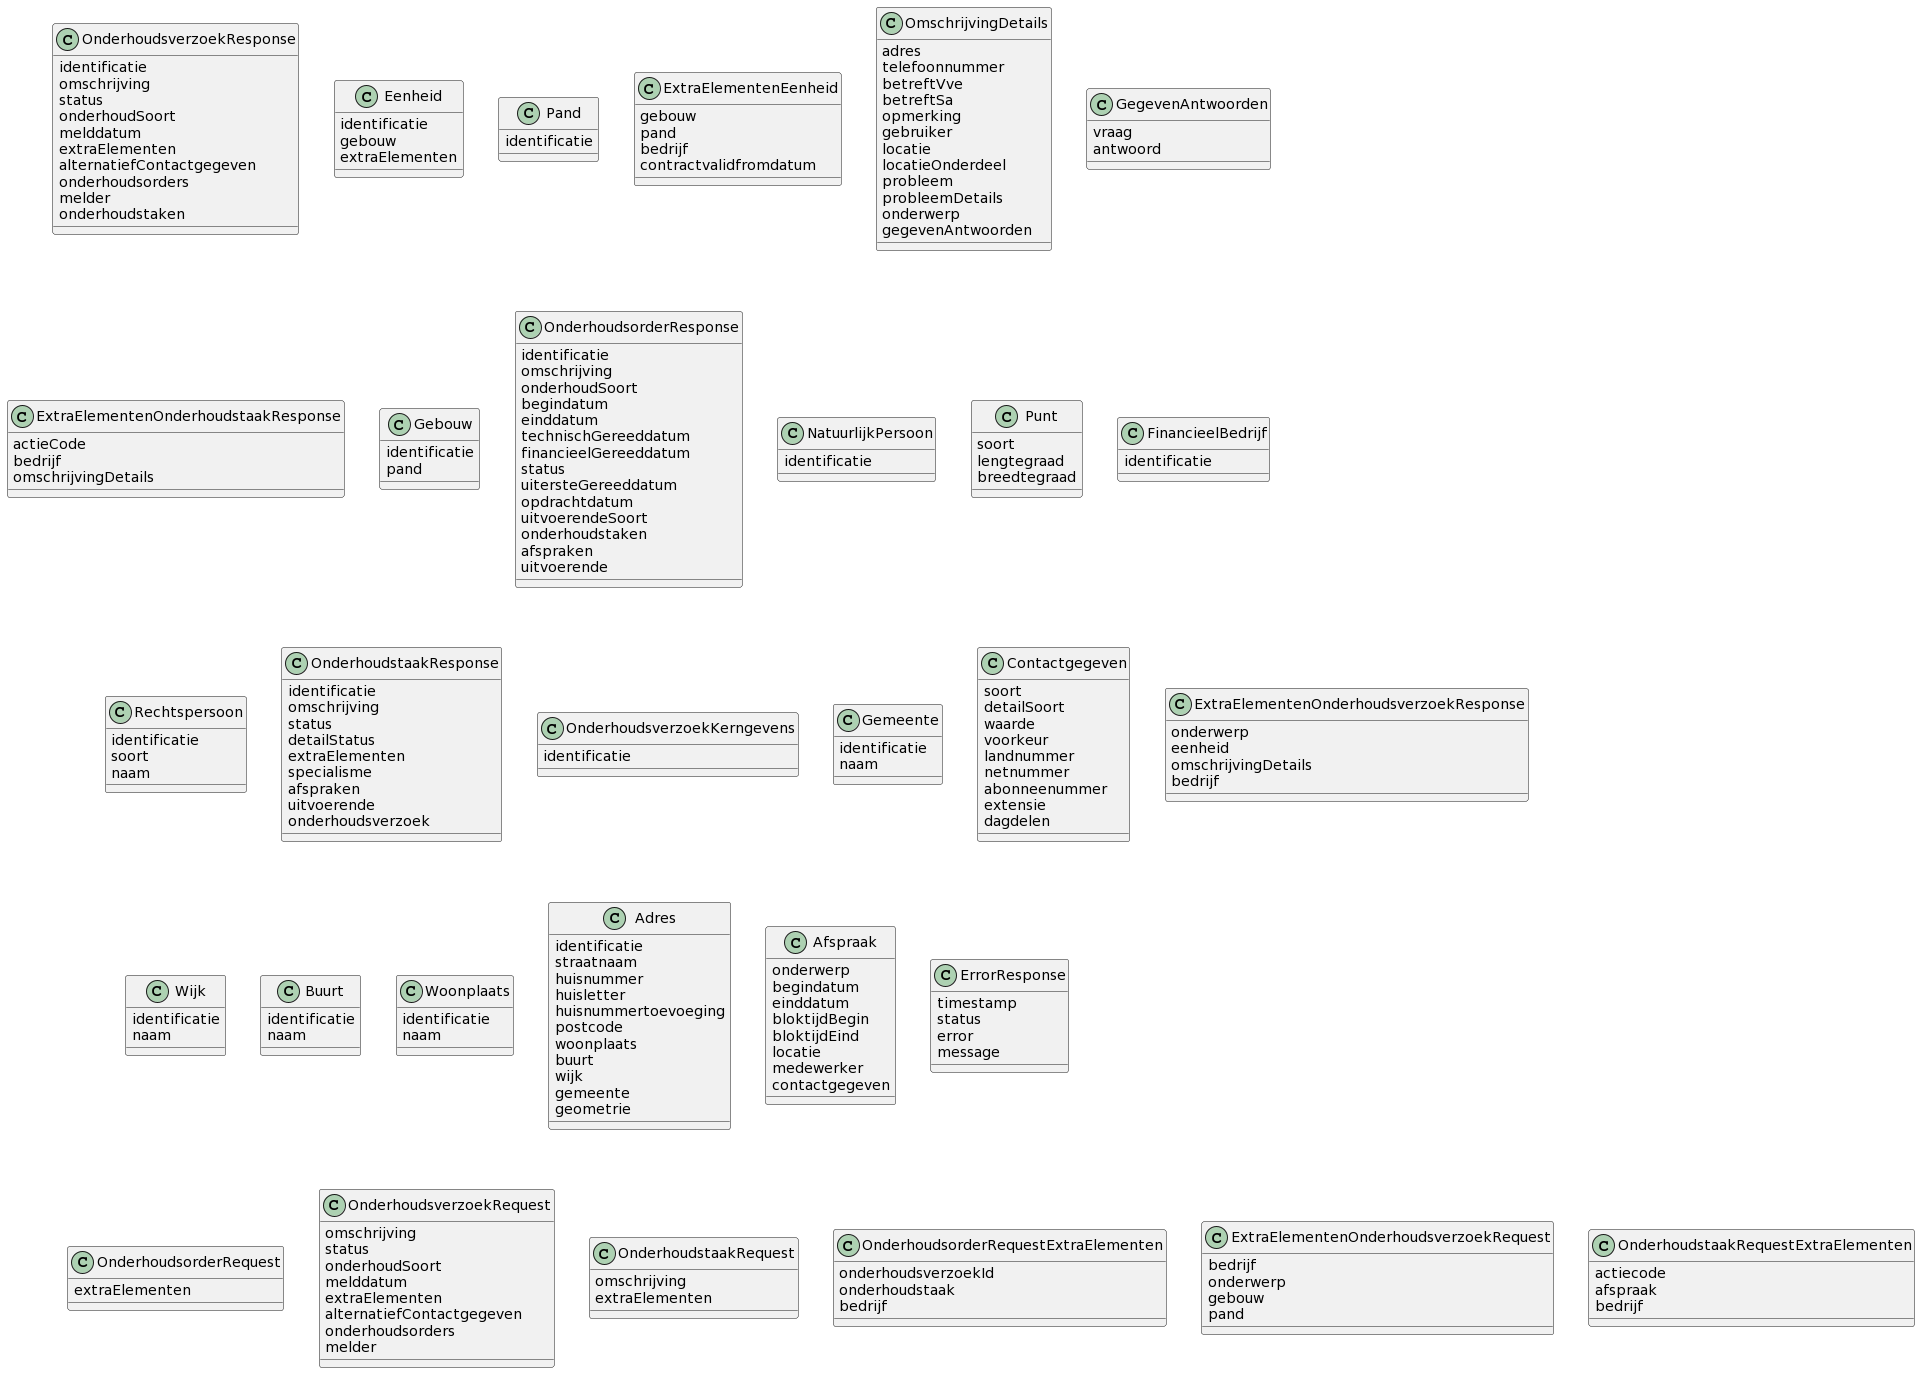

In [28]:
#show the generated png
from IPython import display
display.Image(filename="onderhoudsverzoeken-api_API_plantuml.png", width=1200, height=500)

## Write it to a .csv file

 a .csv file with a ; seperator between key and values

In [29]:
with open(API_name+"_data.csv", mode="w") as pv:
    for key, value in object_dict.items():
        pv.write(str(key)+";")
        for i in range (len(value)-1):
            pv.write(value[i]+",")#write values + a comma  
        pv.write(value[-1]+"\n") #write last value (and no comma) 

In [30]:
import glob
my_csvs=glob.glob('*.csv')
my_csvs

['onderhoudsverzoeken-api_data.csv',
 'planningsverzoeken-api_data.csv',
 'Saxton API_API_objecten.csv',
 'Saxton API_data.csv']

In [102]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\VERA\\planningsverzoeken-api_data.csv